In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_json('posts.json')
sns.set_style()
sns.set_context("notebook")

In [177]:
df

,city,buurt,link,title,subtitle,price,area1,area2,rooms
0,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/huis-4111...,Nieuwendammerdijk 153,1025 LG Amsterdam,598000,109,61,5
1,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/huis-4115...,Nieuwendammerdijk 27,1025 LC Amsterdam,799000,131,80,5
2,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/apparteme...,Nieuwendammerstraat 2 C,1023 AD Amsterdam,475000,96,,4
3,amsterdam,holendrecht-reigersbos,https://www.funda.nl//koop/amsterdam/huis-8747...,Twellostraat 15,1107 PG Amsterdam,425000,122,120,6
4,amsterdam,holendrecht-reigersbos,https://www.funda.nl//koop/amsterdam/huis-8754...,Snodenhoekpark 38,1107 VE Amsterdam,425000,118,138,5
...,...,...,...,...,...,...,...,...,...
1864,amsterdam,jordaan,https://www.funda.nl//koop/amsterdam/apparteme...,Passeerdersstraat 24 C,1016 XC Amsterdam,499000,60,,3
1865,amsterdam,jordaan,https://www.funda.nl//koop/amsterdam/apparteme...,Lijnbaansgracht 131 hs,1016 VV Amsterdam,450000,54,,2
1866,amsterdam,jordaan,https://www.funda.nl//koop/amsterdam/apparteme...,Marnixstraat 105 B,1015 VH Amsterdam,429000,62,,2
1867,amsterdam,jordaan,https://www.funda.nl//koop/amsterdam/apparteme...,Leidsegracht 82 B,1016 CR Amsterdam,685000,81,,3


In [178]:

# # Transform num values into float
to_num = ['price', 'area1', 'area2', 'rooms']
df[to_num] = df[to_num].apply(pd.to_numeric, errors='coerce')
df.describe()

,price,area1,area2,rooms
count,1869.000000,1868.000000,213.000000,1867.000000
mean,603478.054040,98.625268,140.690141,3.597750
std,145490.496158,30.682399,88.529857,1.145126
min,400000.000000,38.000000,1.000000,1.000000
25%,475000.000000,76.000000,93.000000,3.000000
50%,585000.000000,95.000000,122.000000,3.000000
75%,720000.000000,117.250000,160.000000,4.000000
max,900000.000000,450.000000,542.000000,11.000000


In [179]:
df['price_per_m2'] = df['price']/df['area1']
df.head()

,city,buurt,link,title,subtitle,price,area1,area2,rooms,price_per_m2
0,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/huis-4111...,Nieuwendammerdijk 153,1025 LG Amsterdam,598000,109.0,61.0,5.0,5486.238532
1,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/huis-4115...,Nieuwendammerdijk 27,1025 LC Amsterdam,799000,131.0,80.0,5.0,6099.236641
2,amsterdam,nieuwendammerdijk-buiksloterdijk,https://www.funda.nl//koop/amsterdam/apparteme...,Nieuwendammerstraat 2 C,1023 AD Amsterdam,475000,96.0,NaN,4.0,4947.916667
3,amsterdam,holendrecht-reigersbos,https://www.funda.nl//koop/amsterdam/huis-8747...,Twellostraat 15,1107 PG Amsterdam,425000,122.0,120.0,6.0,3483.606557
4,amsterdam,holendrecht-reigersbos,https://www.funda.nl//koop/amsterdam/huis-8754...,Snodenhoekpark 38,1107 VE Amsterdam,425000,118.0,138.0,5.0,3601.694915


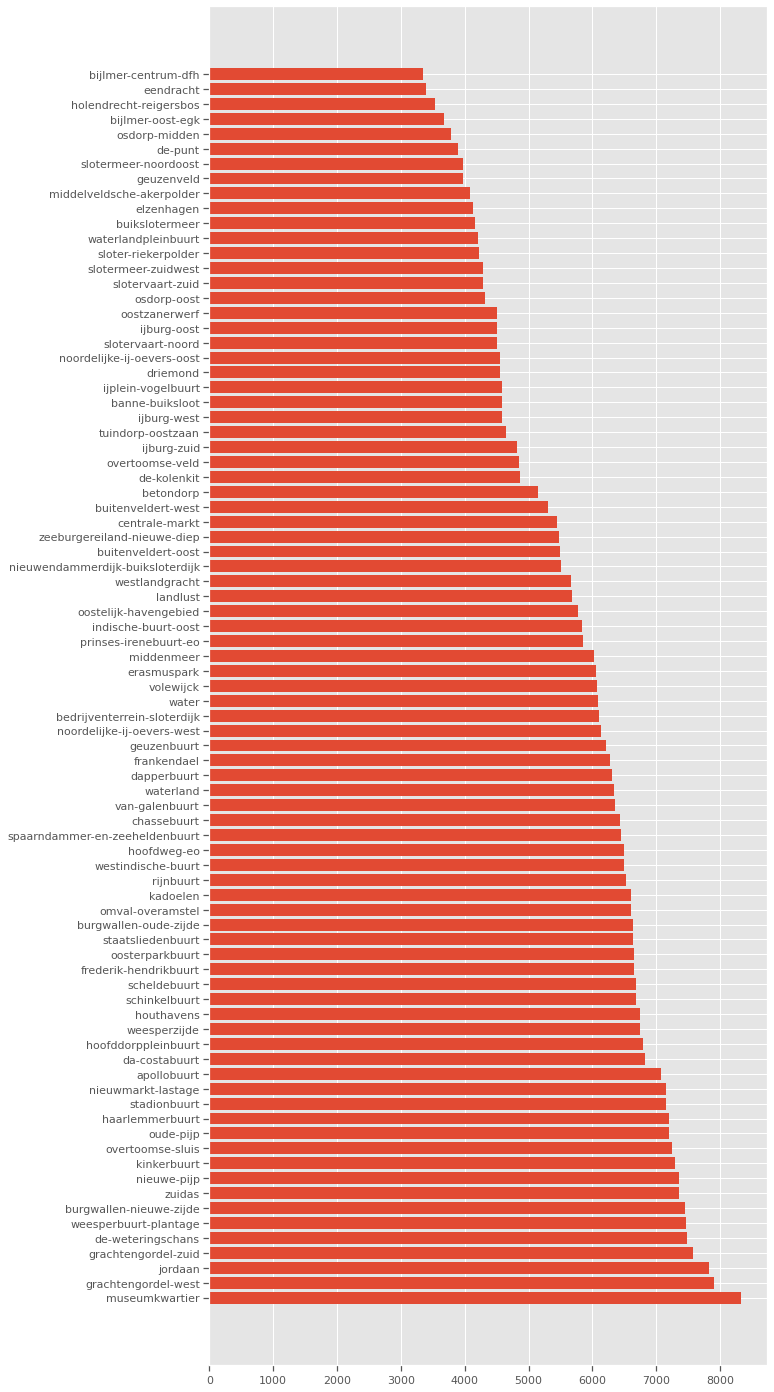

In [181]:
plt.figure(figsize=(10, 25))
df3 = df.groupby('buurt').mean()
df3 = df3[df3['area1']>=80]
df3 = df3.sort_values(by='price_per_m2', ascending= False)

# df3['price_per_m2'].plot(kind='barh')
plt.barh(df3.index, df3['price_per_m2'])

plt.show()

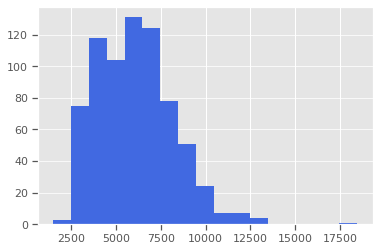

In [130]:

df2 = df[df['price_per_m2'] < 2e4]

min_bin = df2['price_per_m2'].min()
max_bin = df2['price_per_m2'].max()
plt.hist(x=df2['price_per_m2'], bins=np.arange(min_bin,max_bin, 1000), color='royalblue')
plt.grid(axis='y', alpha=0.75)
plt.show()